In [1]:
from skimage import data, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

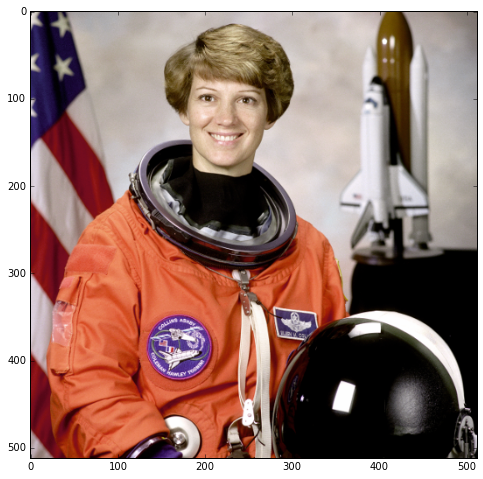

In [5]:
A=data.astronaut()
plt.figure(figsize=(8,8))
plt.imshow(A)

In [3]:
io.imsave('astronauta_local.png', A)

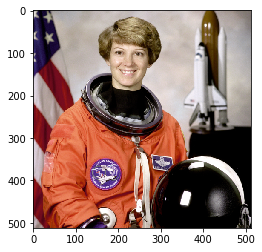

In [7]:
A1=io.imread('astronauta_local.png')
plt.imshow(A1)

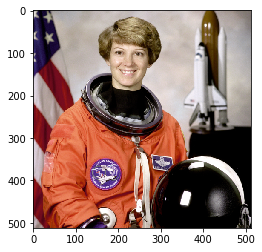

In [8]:
A=data.astronaut()
#plt.figure(figsize=(6,6))
plt.imshow(A)

In [11]:
print (A.shape)
print (A.dtype)

(512, 512, 3)
uint8


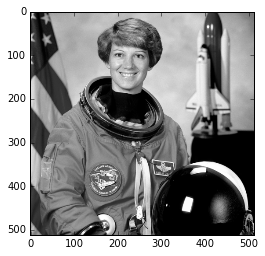

In [9]:
A_grey = (A.sum(2)/3).astype(np.uint8)
plt.imshow(A_grey, cmap=plt.cm.gray)

In [20]:
print (A_grey.shape)
print (A_grey.dtype)

(512, 512)
uint8


(-0.5, 511.5, 511.5, -0.5)

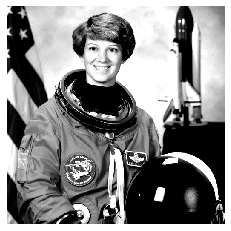

In [38]:
plt.imshow(A_grey, cmap=plt.cm.gray, vmin=50, vmax=200)
plt.axis('off')

c:\python27\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\python27\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


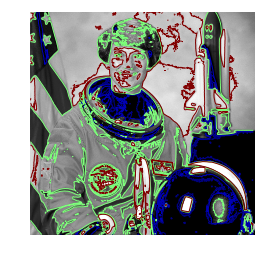

In [10]:
plt.imshow(A_grey, cmap=plt.cm.gray, vmin=10, vmax=250)
plt.axis('off')
plt.contour(A_grey, levels=(0,10,100, 200))

(-0.5, 49.5, 39.5, -0.5)

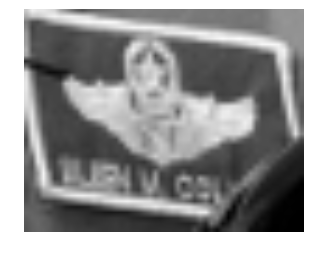

In [11]:
parche=A_grey[340:380, 280:330]
plt.imshow(parche, cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 49.5, 39.5, -0.5)

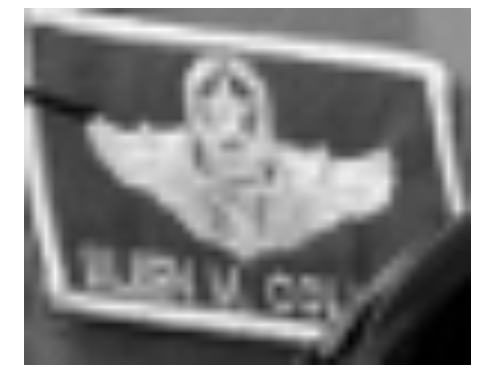

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(parche, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

In [72]:
A_grey[0,40]

76

In [77]:
A_grey[20:30,40:50]

array([[154, 142, 131, 126, 114, 110, 118, 133, 155, 171],
       [142, 131, 120, 114, 109, 106, 123, 138, 155, 169],
       [124, 108,  97, 101, 100,  95, 113, 131, 148, 167],
       [106,  77,  64,  74,  80,  84,  98, 126, 143, 163],
       [ 89,  46,  32,  44,  55,  66,  83, 113, 137, 160],
       [ 71,  30,  27,  32,  32,  45,  61,  99, 130, 153],
       [ 52,  27,  26,  30,  30,  29,  41,  82, 119, 148],
       [ 39,  26,  22,  29,  26,  26,  34,  61, 100, 139],
       [ 25,  30,  27,  30,  27,  23,  23,  47,  97, 127],
       [ 29,  31,  29,  26,  24,  25,  24,  37,  82, 119]], dtype=uint8)

In [13]:
A_grey[340:380, 280:330]=255

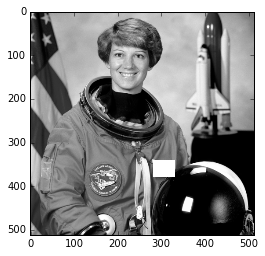

In [14]:
plt.imshow(A_grey, cmap=plt.cm.gray)

In [82]:
lx, ly = A_grey.shape

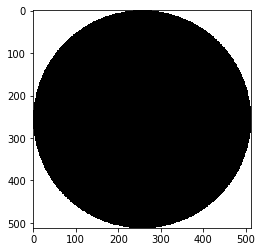

In [84]:
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
plt.imshow(mask, cmap=plt.cm.gray)

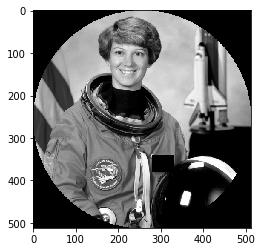

In [90]:
A_grey[mask] = 0
plt.imshow(A_grey, cmap=plt.cm.gray)

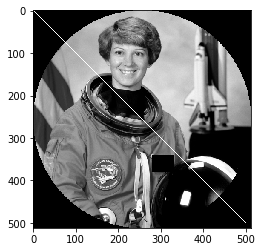

In [104]:
A_grey[range(0), range(0)] = 255
plt.imshow(A_grey, cmap=plt.cm.gray)

In [105]:
print(A_grey.mean(), A_grey.max(), A_grey.min())


91.69924926757812 255 0


<IPython.core.display.Javascript object>


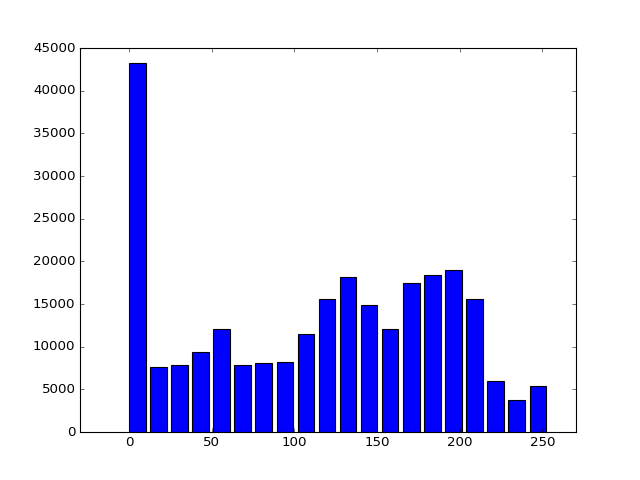

<Container object of 20 artists>

In [15]:
%matplotlib notebook
a,b=np.histogram(A_grey, bins=20)
a.shape, b.shape
plt.bar(b[:-1],a,10)
#plt.show()

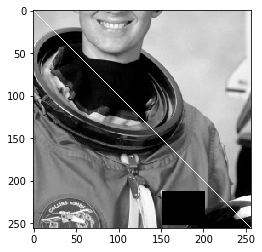

In [163]:
lx, ly = A_grey.shape
cropA=A_grey[int(lx/4):int(lx*3/4),int(ly/4):int(ly*3/4)]
plt.imshow(cropA, cmap=plt.cm.gray)

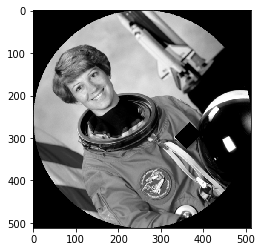

In [166]:
from skimage import transform
rotA = transform.rotate(A_grey, 45)
plt.imshow(rotA, cmap=plt.cm.gray)

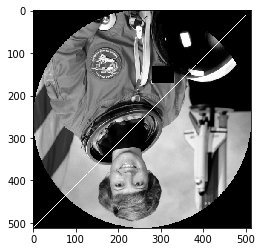

In [175]:
fudA=A_grey[::-1]
plt.imshow(fudA, cmap=plt.cm.gray)

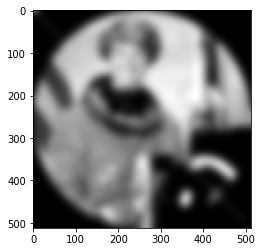

In [181]:
from skimage import filters
gfiltA = filters.gaussian(A_grey, sigma=(10,10), multichannel=True)
plt.imshow(gfiltA, cmap=plt.cm.gray)

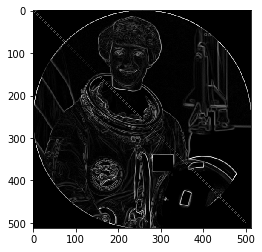

In [184]:
from skimage import filters
sofiltA = filters.sobel(A_grey)
plt.imshow(sofiltA, cmap=plt.cm.gray)

In [194]:
from skimage.external.tifffile import tifffile

In [195]:
mdimage=tifffile.imread("multipage_tif_example.tif", key=0)

ValueError: cannot decompress jpeg